Beobachtete Häufigkeiten:
[[ 31  77]
 [112  87]]

Erwartete Häufigkeiten:
[[ 50.30618893  57.69381107]
 [ 92.69381107 106.30618893]]

Berechneter χ²-Wert: 21.40
Freiheitsgrade: 1
p-Wert: 0.000004

Kritische Werte:
alpha=0.05: 3.841
alpha=0.01: 6.635
alpha=0.001: 10.828


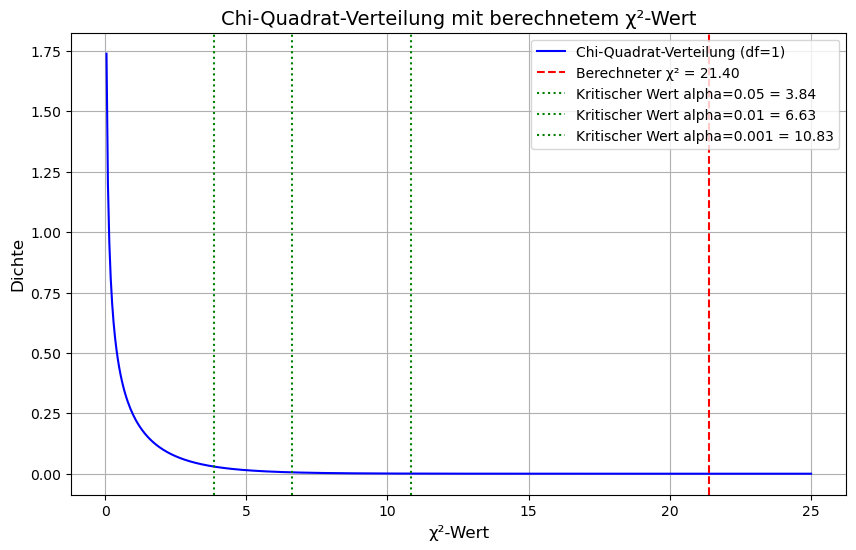

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Beobachtete Häufigkeiten (Tabelle)
observed = np.array([[31, 77], [112, 87]])

# 2. Berechnung der erwarteten Häufigkeiten
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
grand_total = observed.sum()
expected = np.outer(row_totals, col_totals) / grand_total

# 3. Berechnung des Chi-Quadrat-Werts
chi2_stat = ((observed - expected) ** 2 / expected).sum()

# 4. Freiheitsgrade
df = (observed.shape[0] - 1) * (observed.shape[1] - 1)

# 5. p-Wert berechnen
p_value = stats.chi2.sf(chi2_stat, df)

# 6. Kritische Werte für verschiedene Signifikanzniveaus
critical_values = {
    "alpha=0.05": stats.chi2.ppf(1 - 0.05, df),
    "alpha=0.01": stats.chi2.ppf(1 - 0.01, df),
    "alpha=0.001": stats.chi2.ppf(1 - 0.001, df)
}

# 7. Ergebnisse ausgeben
print("Beobachtete Häufigkeiten:")
print(observed)
print("\nErwartete Häufigkeiten:")
print(expected)
print(f"\nBerechneter χ²-Wert: {chi2_stat:.2f}")
print(f"Freiheitsgrade: {df}")
print(f"p-Wert: {p_value:.6f}")
print("\nKritische Werte:")
for alpha, value in critical_values.items():
    print(f"{alpha}: {value:.3f}")

# 8. Visualisierung der Chi-Quadrat-Verteilung
# Daten für die Chi-Quadrat-Verteilung generieren
x = np.linspace(0, 25, 500)
y = stats.chi2.pdf(x, df)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Chi-Quadrat-Verteilung (df=1)", color="blue")

# Berechneten χ²-Wert markieren
plt.axvline(chi2_stat, color="red", linestyle="--", label=f"Berechneter χ² = {chi2_stat:.2f}")

# Kritische Werte markieren
for label, value in critical_values.items():
    plt.axvline(value, color="green", linestyle=":", label=f"Kritischer Wert {label} = {value:.2f}")

# Achsen und Titel
plt.title("Chi-Quadrat-Verteilung mit berechnetem χ²-Wert", fontsize=14)
plt.xlabel("χ²-Wert", fontsize=12)
plt.ylabel("Dichte", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()